## Classificação de variáveis

### Importando as bibliotecas 

In [1]:
import re
import unicodedata
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

warnings.filterwarnings("ignore")

In [2]:
df_firstn = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv", nrows=1)
df_firstn

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.5,1.19


## Análise exploratória dataset Iowa_Liquor_Sales

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


## Escolha das colunas do dataset para a análise exploratória

In [4]:
req_cols=['Date','City','County','Item Description','State Bottle Cost','State Bottle Retail','Volume Sold (Liters)']

### Criação do dataframe df contendo as colunas selecionadas previamente através da lista req_cols. Isso diminui bastante o dataset e possibilita a sua análise

In [5]:
df = pd.read_csv("../data/raw/Iowa_Liquor_Sales.csv", usecols=req_cols)

In [6]:
df['City'].isnull().values.any()

True

In [7]:
df['County'].isnull().values.any()

True

In [8]:
df['Item Description'].isnull().values.any()

False

In [9]:
df['State Bottle Cost'].isnull().values.any()

True

In [10]:
df['State Bottle Retail'].isnull().values.any()

True

In [11]:
df['Volume Sold (Liters)'].isnull().values.any()

False

### Eliminamos os valores NaN da tabela para diminuir o tamanho do dataset

In [12]:
df=df.dropna()

### Para ter uma ideia inicial dos dados os quais dispomos, iremos utilizar o head e logo em seguida o tail com as 20 primeiras e 20 últimas linhas do dataset:

In [13]:
df.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
0,11/20/2015,KEOKUK,Lee,Templeton Rye w/Flask,$18.09,$27.14,4.50
1,11/21/2015,CLARINDA,Page,Templeton Rye w/Flask,$18.09,$27.14,9.00
2,11/16/2015,FORT MADISON,Lee,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$6.40,$9.60,0.30
3,11/04/2015,IOWA CITY,Johnson,Knob Creek w/ Crystal Decanter,$35.55,$53.34,5.25
4,11/17/2015,TOLEDO,Tama,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$6.40,$9.60,0.30


In [14]:
df.tail()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
12591072,10/31/2017,Sheldon,OBRIEN,FrappaChata Iced Coffee Blend,$8.00,$12.00,2.4
12591073,10/31/2017,Sheldon,OBRIEN,Old Forester Statesman,$27.48,$41.22,1.5
12591074,10/31/2017,Sheldon,OBRIEN,Old Forester 1897 Whisky Row Series,$24.98,$37.47,1.5
12591075,10/31/2017,Sheldon,OBRIEN,Old Forester 1870 Whisky Row Series,$22.49,$33.74,1.5
12591076,10/31/2017,Sheldon,OBRIEN,Sugarlands Shine Peanut Butter & Jelly Moonshine,$13.00,$19.50,1.5


### Parece que precisaremos realizar algum tipo de transformação nesses dados. Pode-se perceber que às vezes o nome da cidade ou condado aparece com nome maiúsculo e às vezes minusculo. por via das dúvidas iremos fazer isso com a descrição do item também. Isso influencia de alguma forma nossa análise.

In [15]:
df['City'] = df['City'].str.upper()
df['County'] = df['County'].str.upper()
df['Item Description'] = df['Item Description'].str.upper()

In [16]:
df.tail(1)

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
12591076,10/31/2017,SHELDON,OBRIEN,SUGARLANDS SHINE PEANUT BUTTER & JELLY MOONSHINE,$13.00,$19.50,1.5


### Vamos retirar os cifrões do preço de custo e do preço de venda para facilitar futuras operações com esses números :

In [17]:
df['State Bottle Cost'] = df['State Bottle Cost'].replace({'\$':''}, regex = True)
df['State Bottle Retail'] = df['State Bottle Retail'].replace({'\$':''}, regex = True)

KeyboardInterrupt: 

### Temos também um problema com o condado de O'BRIEN, pois algumas vezes ele aparece com ou sem a aspa simples

In [ ]:
df.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
0,11/20/2015,KEOKUK,LEE,TEMPLETON RYE W/FLASK,18.09,27.14,4.50
1,11/21/2015,CLARINDA,PAGE,TEMPLETON RYE W/FLASK,18.09,27.14,9.00
2,11/16/2015,FORT MADISON,LEE,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,6.40,9.60,0.30
3,11/04/2015,IOWA CITY,JOHNSON,KNOB CREEK W/ CRYSTAL DECANTER,35.55,53.34,5.25
4,11/17/2015,TOLEDO,TAMA,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,6.40,9.60,0.30


In [ ]:
df.tail()

Error: Session cannot generate requests

### Em qual condado se vendeu mais?

In [ ]:
county_sales = df['County'].value_counts().nlargest(20)
# county_sales.plot(kind="barh")
plt.figure(figsize=(10,8))
sns.barplot(
    data=df,
    x=df["County"],
    y=df["County"].value_counts().nlargest(20)
)
county_sales

Error: Session cannot generate requests

### Sabendo que o condado de POLK foi o que vendeu mais, quais cidades do condado de POLK venderam mais?

#### Filtrando as cidades do condado de POLK

In [ ]:
polk = df[df['County']=='POLK']
polk.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
11,2015-11-05,DES MOINES,POLK,KNOB CREEK W/ CRYSTAL DECANTER,35.55,53.34,3.50
22,2015-11-04,ALTOONA,POLK,KNOB CREEK W/ CRYSTAL DECANTER,35.55,53.34,5.25
27,2015-11-10,ANKENY,POLK,KNOB CREEK W/ CRYSTAL DECANTER,35.55,53.34,5.25
31,2015-11-17,ANKENY,POLK,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,6.40,9.60,3.00
42,2015-11-19,DES MOINES,POLK,LAPHROAIG W/ WHISKEY STONES,19.58,29.37,27.00


#### Quais cidades há no condado de POLK?

In [ ]:
polk['City'].unique()

array(['DES MOINES', 'ALTOONA', 'ANKENY', 'WEST DES MOINES',
       'PLEASANT HILL', 'GRIMES', 'JOHNSTON', 'URBANDALE', 'CLIVE',
       'WINDSOR HEIGHTS', 'BONDURANT', 'POLK CITY', 'CAMBRIDGE',
       'MITCHELLVILLE', 'RUNNELLS', 'SWISHER'], dtype=object)

#### Em quais cidade do condado de POLK se vendeu mais bebida?

<AxesSubplot:>

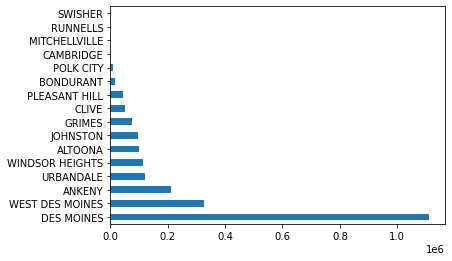

In [ ]:
polk['City'].value_counts().plot(kind="barh")

#### Quais cidades no estado do IOWA venderam mais bebida?

<AxesSubplot:>

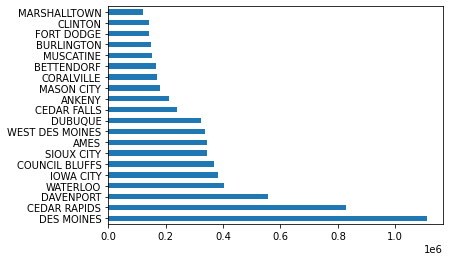

In [ ]:
city_sales = df['City'].value_counts().nlargest(20)
city_sales.plot(kind="barh")

#### Transformando o os dados da coluna Date em formato datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.tail()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
12591072,2017-10-31,SHELDON,OBRIEN,FRAPPACHATA ICED COFFEE BLEND,8.00,12.00,2.4
12591073,2017-10-31,SHELDON,OBRIEN,OLD FORESTER STATESMAN,27.48,41.22,1.5
12591074,2017-10-31,SHELDON,OBRIEN,OLD FORESTER 1897 WHISKY ROW SERIES,24.98,37.47,1.5
12591075,2017-10-31,SHELDON,OBRIEN,OLD FORESTER 1870 WHISKY ROW SERIES,22.49,33.74,1.5
12591076,2017-10-31,SHELDON,OBRIEN,SUGARLANDS SHINE PEANUT BUTTER & JELLY MOONSHINE,13.00,19.50,1.5


#### Filtrando os dados por ano

In [ ]:
year_2012 = df[df['Date'].dt.year == 2012]
year_2012.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
102,2012-11-06,GUTHRIE CENTER,GUTHRIE,CRUZAN MANGO RUM,6.82,10.24,2.25
103,2012-04-03,ANAMOSA,JONES,ARROW PEPPERMINT SCHNAPPS,7.04,10.56,5.25
106,2012-11-13,AMES,STORY,KINKY LIQUEUR,10.00,15.00,9.00
110,2012-07-31,SPIRIT LAKE,DICKINSON,BACARDI SUPERIOR RUM PET,7.53,11.30,9.00
113,2012-10-16,RED OAK,MONTGOMERY,UV BLUE (RASPBERRY) VODKA,6.25,9.49,9.00


In [ ]:
year_2013 = df[df['Date'].dt.year == 2013]
year_2013.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
100,2013-02-20,BURLINGTON,DES MOINES,ABSENTE,21.67,32.50,3.0
104,2013-07-08,FORT MADISON,LEE,UV BLUE (RASPBERRY) VODKA,7.50,11.25,12.0
107,2013-05-21,WATERLOO,BLACK HAWK,PATRON SILVER TEQUILA,8.50,12.75,0.8
109,2013-11-26,CHARITON,LUCAS,SWEET REVENGE,10.98,16.47,4.5
114,2013-04-17,OSKALOOSA,MAHASKA,PENDLETON CANADIAN WHISKY,12.10,18.65,1.5


In [ ]:
year_2014 = df[df['Date'].dt.year == 2014]
year_2014.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
108,2014-02-26,DAVENPORT,SCOTT,BUSHMILLS IRISH WHISKEY,13.00,19.50,3.0
112,2014-04-07,BETTENDORF,SCOTT,GORDON'S GIN LONDON DRY - PET,11.00,16.49,10.5
122,2014-06-12,ALTOONA,POLK,BARTON VODKA,6.92,10.38,10.5
123,2014-05-23,MASON CITY,CERRO GORDO,GLENLIVET 12 YR MALT SCOTCH,22.07,33.11,1.5
126,2014-04-02,DUBUQUE,DUBUQUE,KESSLER BLEND WHISKEY,5.51,8.26,9.0


In [ ]:
year_2015 = df[df['Date'].dt.year == 2015]
year_2015.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
0,2015-11-20,KEOKUK,LEE,TEMPLETON RYE W/FLASK,18.09,27.14,4.50
1,2015-11-21,CLARINDA,PAGE,TEMPLETON RYE W/FLASK,18.09,27.14,9.00
2,2015-11-16,FORT MADISON,LEE,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,6.40,9.60,0.30
3,2015-11-04,IOWA CITY,JOHNSON,KNOB CREEK W/ CRYSTAL DECANTER,35.55,53.34,5.25
4,2015-11-17,TOLEDO,TAMA,DISARONNO AMARETTO CAVALLI MIGNON 3-50ML PACK,6.40,9.60,0.30


In [ ]:
year_2016 = df[df['Date'].dt.year == 2016]
year_2016.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
8427861,2016-01-26,SHELDON,O'BRIEN,SHEEP DIP,21.50,32.25,0.75
8428102,2016-01-12,CEDAR RAPIDS,LINN,LAPHROAIG W/ WHISKEY STONES,19.58,29.37,1.50
8428103,2016-01-13,IOWA CITY,JOHNSON,LAPHROAIG W/ WHISKEY STONES,19.58,29.37,9.00
8428104,2016-01-13,CORALVILLE,JOHNSON,LAPHROAIG W/ WHISKEY STONES,19.58,29.37,2.25
8428105,2016-01-14,CEDAR FALLS,BLACK HAWK,LAPHROAIG W/ WHISKEY STONES,19.58,29.37,0.75


In [ ]:
year_2017 = df[df['Date'].dt.year == 2017]
year_2017.head()

,Date,City,County,Item Description,State Bottle Cost,State Bottle Retail,Volume Sold (Liters)
10708015,2017-01-03,COUNCIL BLUFFS,POTTAWATTA,HOUSE OF STUART,10.52,15.78,5.25
10708016,2017-01-03,COUNCIL BLUFFS,POTTAWATTA,BOMBAY DRY GIN,10.50,15.75,0.75
10708017,2017-01-03,COUNCIL BLUFFS,POTTAWATTA,HPNOTIQ,9.83,14.75,0.75
10708018,2017-01-03,COUNCIL BLUFFS,POTTAWATTA,BAILEY'S ORIGINAL IRISH CREAM,16.50,24.75,2.00
10708019,2017-01-03,COUNCIL BLUFFS,POTTAWATTA,CANADIAN CLUB WHISKY,9.71,14.57,1.00


In [ ]:
year = [2012,2013,2014,2015,2016,2017]
qtt = []
qtt.append(len(year_2012.index))
qtt.append(len(year_2013.index))
qtt.append(len(year_2014.index))
qtt.append(len(year_2015.index))
qtt.append(len(year_2016.index))
qtt.append(len(year_2017.index))
qtt

[2078450, 2061103, 2096742, 2183364, 2210543, 1881687]

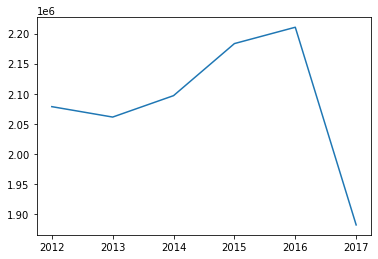

In [ ]:
plt.plot(year, qtt)

In [ ]:
year = [2012,2013,2014,2015,2016]
qtt = []
qtt.append(len(year_2012.index))
qtt.append(len(year_2013.index))
qtt.append(len(year_2014.index))
qtt.append(len(year_2015.index))
qtt.append(len(year_2016.index))
qtt

[2078450, 2061103, 2096742, 2183364, 2210543]

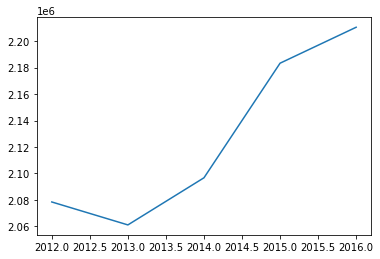

In [ ]:
plt.plot(year, qtt)

In [ ]:
volume_per_month_2012 = year_2012['Date']

In [ ]:
volume_per_month_2013 = year_2013['Date']

In [ ]:
volume_per_month_2014 = year_2014['Date']

In [ ]:
volume_per_month_2015 = year_2015['Date']

In [ ]:
volume_per_month_2016 = year_2016['Date']

In [ ]:
volume_per_month_2017 = year_2017['Date']

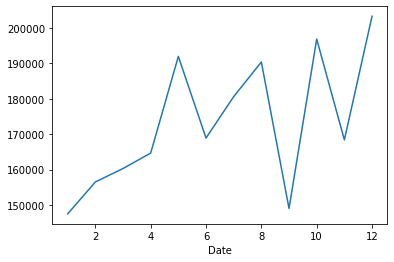

In [ ]:
volume_per_month_2012.groupby(volume_per_month_2012.dt.month).count().plot.line()

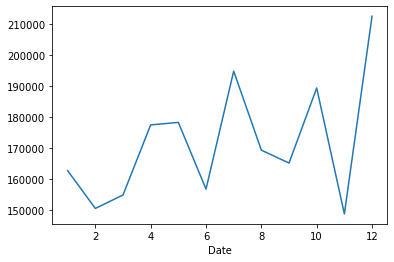

In [ ]:
volume_per_month_2013.groupby(volume_per_month_2013.dt.month).count().plot.line()

<AxesSubplot:xlabel='Date'>

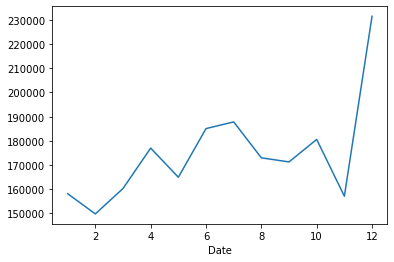

In [ ]:
volume_per_month_2014.groupby(volume_per_month_2014.dt.month).count().plot.line()

<AxesSubplot:xlabel='Date'>

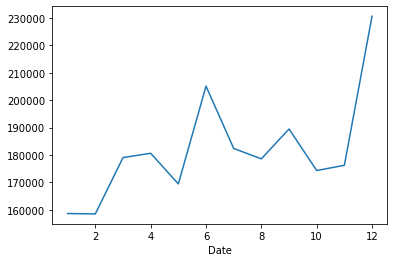

In [ ]:
volume_per_month_2015.groupby(volume_per_month_2015.dt.month).count().plot.line()

<AxesSubplot:xlabel='Date'>

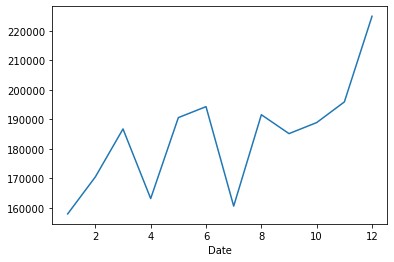

In [ ]:
volume_per_month_2016.groupby(volume_per_month_2016.dt.month).count().plot.line()

<AxesSubplot:xlabel='Date'>

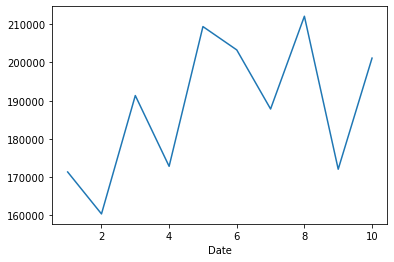

In [ ]:
volume_per_month_2017.groupby(volume_per_month_2017.dt.month).count().plot.line()